## KRUSKAL

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

Implementacion del grafo mostrado en la pregunta 6

In [30]:
graph = [[5, 0, 10], [5, 4, 25], [0, 1, 28], [4, 6, 24], [4, 3, 22],
 [6, 1, 14], [6, 3, 18], [3, 2, 12], [1, 2, 16]]

V = 7

Implementacion modificada del algoritmo visto en clase:

In [31]:
def kruskal_algo(graph, V):
    
    result = [] #ARRAY OF EDGES OF THE RESULT SINTAX:[(u,v,w),(u,v,w)....]
    
    i, e = 0, 0 #INISIALIZE INDEXES
    
    graph = sorted(graph, key=lambda item: item[2]) #ORDER THE EDGES OF THE GRAPH BY THE WEIGHT ASCENDENTING
    parent = [node for node in range(V)] #THE PARENT ITS THE NODE ITSELF
    rank = [0] * V #ARRAY OF CEROS, REPRESENT HOW DEPH IS THE NODE

    def find(parent, node): #ABSOLUTE PARENT OF THE NODE
        if parent[node] != node: # IF THE PARENT NODE ITS NOT THE NODE ITSELF
            parent[node] = find(parent, parent[node]) #FIND THE PARENT OF THE NODE (parent is the array, parent[node] is where point the node])
        return parent[node] #RETURN THE ABSOLUTE PARENT OF THE NODE

    def apply_union(parent, rank, x, y): #APLIES THE UNION BETWEEN TWO NODES HOW HAVE DIFERENTE ABSOLUTE PARENTS VALUES
        x_root = find(parent, x) # x_root IS THE ABSOLUTE PARENT OF 'X'
        y_root = find(parent, y) # y_root IS THE ABSOOLUTE PARENT OF 'Y'
        if rank[x_root] < rank[y_root]: 
        # COMPARITION BETWEEN THE RANK OF THE ABSOLUTE PARENTS OF X AND Y
        # THIS COMPARTION ITS NECESARY FOR SELECT THE NEW PARENT OF THE TWO NODES
        # parent[x_root] = y_root IT MEANS THAT IF THE RANK OF THE ABSOLUTE PARENT OF Y IS 
        # HIGHER THAN THE RANK OF THE ABSOLUTE PARTEN OF Y, SO THE NEW PARENT OF THE ABSOLUTE 
        # PARTEN OF X (x_root) IS NOW y_root
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
        #ITS THE SAME COMPARITION BUT NOW IN THE CASE THAT THE RANK OF x_root IS HIGHER THAN y_root
            parent[y_root] = x_root
        else:
        # IN CASE THAT THE RANKS ARE THE SAME
            parent[y_root] = x_root
            rank[x_root] += 1

    while e < V - 1: # e: ITERATION INDEX | V - 1: #VERTEX - 1 (EDGES HAVE TO BE THE # OF VERTEX - 1, EJ: if v = 5 , e = 4 FOR KRUSKAL)
        u, v, w = graph[i] #EXTRACT THE FIRST EDGES [(u,v,w)]
        i += 1 # SUM + 1 IN THE I INDEX
        x = find(parent, u) # FIND THE ABSOLUTE PARENT OF THE 'u' NODE OR 'FROM' NODE
        y = find(parent, v) # FIND THE ABSOLUTE PARENT OF THE 'v' NODE OR 'TO' NODE
        if x != y: # IF THE ABSOLUTE PARENTS OF 'x' AND 'y' ARE DIFERENT
            e += 1 
            # e + 1 BECAUSE WE FIND THAT THE TWO NODES HAVE DIFERENT ABSOLUTE PARENTS SO THIS MEAN THAT CAN'T EXIST A CYCLE IF THE EDGE
            # OF THIS TWO NODES IS ADDED TO THE RESULT LIST OF EDGES (WICH IS THE SOLUTION OF KRUSKAL)
            result.append([u, v, w]) # WE ADDED THE EDGE
            apply_union(parent, rank, x, y) # ADD UNION TO CHANGE THE NEW PARENTS OF EACH NODE
    for u, v, weight in result: #DISPLAY
        print("%d - %d: %d" % (u+1, v+1, weight))
    return result
edges = kruskal_algo(graph, V=V)

6 - 1: 10
4 - 3: 12
7 - 2: 14
2 - 3: 16
5 - 4: 22
6 - 5: 25


In [32]:
#This function is used to be able to give the true values to the graph
def increase(lista):
    for i in range(len(lista)):
        for j in range(len(lista[i])):
            if j != 2:
                lista[i][j] += 1
    return lista
edges = increase(edges)

## VISUALIZE WITH NETWORKX

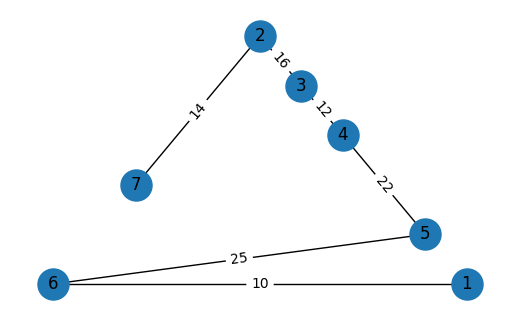

In [33]:
def visualize_graph(G):
    plt.figure(figsize=(5, 3))
    pos = nx.planar_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
    plt.show()
graph = nx.Graph()
graph.add_weighted_edges_from(edges)
visualize_graph(graph)